In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from performance_indicator import *
from trading_computation import *
from plotting_computation import *

In [2]:
TRAIN = False
WINDOW = 30
INCREASE_RF = False

In [3]:

if TRAIN:
    file_keyword = 'TRAIN'
else:
    file_keyword = 'TEST'

if INCREASE_RF:
    ma = pd.read_csv(f'models_data/MA_RSI_{file_keyword}_RF.csv')
    macd = pd.read_csv(f'models_data/MACD_{file_keyword}_RF.csv')
    lstm = pd.read_csv(f'models_data/LSTM_{file_keyword}_RF.csv')
else:
    ma = pd.read_csv(f'models_data/MA_RSI_{file_keyword}.csv')
    macd = pd.read_csv(f'models_data/MACD_{file_keyword}.csv')
    lstm = pd.read_csv(f'models_data/LSTM_{file_keyword}.csv')
    
ma['Date'] = pd.to_datetime(ma['Date'])
macd['Date'] = pd.to_datetime(macd['Date'])
lstm['Date'] = pd.to_datetime(lstm['Date'])

### Check the volatility

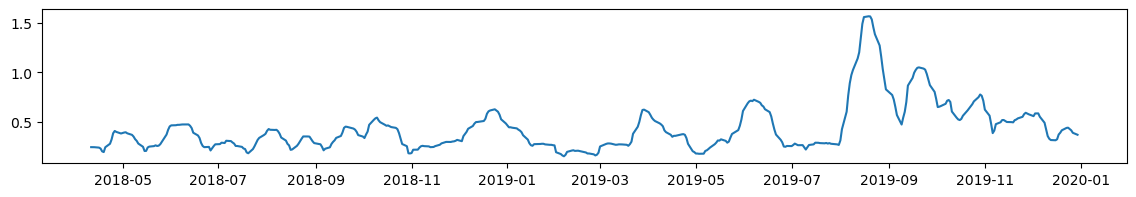

In [4]:
plt.figure(figsize=(14, 2))
price_std = ma['Close'].rolling(window = 20).std()
plt.plot(ma['Date'], price_std)

Turnover in dollars: 12756912.34589959
Turnover in units: 244824.9366550028


/Users/chenkangan/Documents/UCL DSML/Algorithmic Trading/CW2/plotting_computation.py:189: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


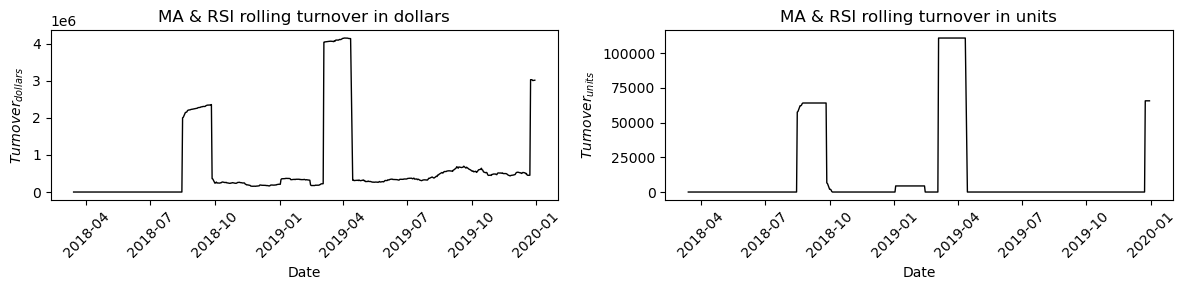

In [5]:
ma_turnover_dollar = calculate_rolling_turnover(theta = ma['theta'], 
                           price = ma['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

ma_turnover_unit = calculate_rolling_turnover(theta = ma['theta'], 
                           price = ma['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(ma, ma_turnover_dollar, ma_turnover_unit, mode = 'Rolling')
ax[0].set_title('MA & RSI rolling turnover in dollars')
ax[1].set_title('MA & RSI rolling turnover in units')

print(f"Turnover in dollars: {calculate_turnover(theta = ma['theta'], price = ma['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = ma['theta'], price = ma['Close'], mode = 'unit')}")

Turnover in dollars: 1094138221.3067932
Turnover in units: 27462565.875110697


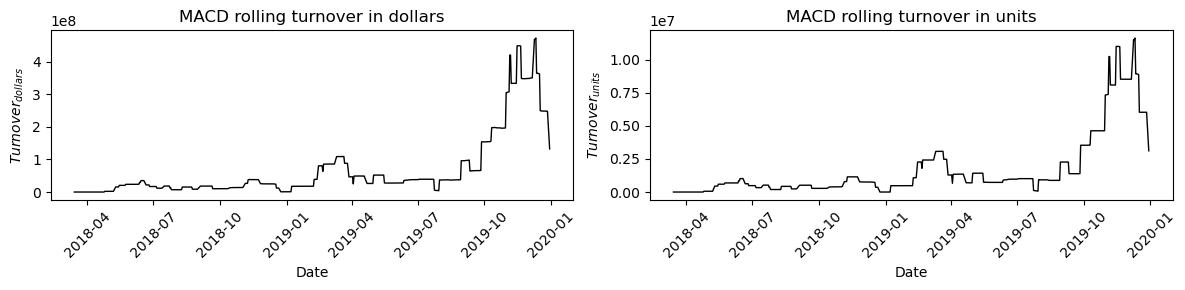

In [6]:
macd_turnover_dollar = calculate_rolling_turnover(theta = macd['theta'], 
                           price = macd['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

macd_turnover_unit = calculate_rolling_turnover(theta = macd['theta'], 
                           price = macd['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(macd, macd_turnover_dollar, macd_turnover_unit, mode = 'Rolling')
ax[0].set_title('MACD rolling turnover in dollars')
ax[1].set_title('MACD rolling turnover in units')
print(f"Turnover in dollars: {calculate_turnover(theta = macd['theta'], price = macd['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = macd['theta'], price = macd['Close'], mode = 'unit')}")

Turnover in dollars: 55043354.73447845
Turnover in units: 1264339.1348304106


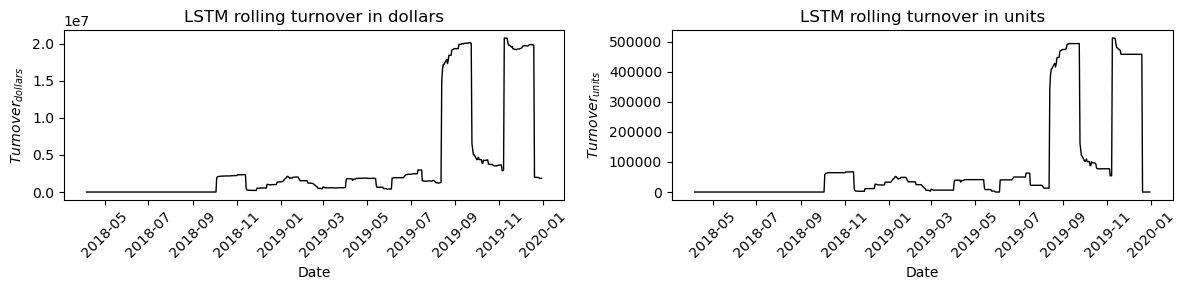

In [7]:
lstm_turnover_dollar = calculate_rolling_turnover(theta = lstm['theta'], 
                           price = lstm['Close'], 
                           window_size = WINDOW,
                           mode = 'dollar')

lstm_turnover_unit = calculate_rolling_turnover(theta = lstm['theta'], 
                           price = lstm['Close'], 
                           window_size = WINDOW,
                           mode = 'unit')

    
fig, ax = plot_turnover(lstm, lstm_turnover_dollar, lstm_turnover_unit, mode = 'Rolling')
ax[0].set_title('LSTM rolling turnover in dollars')
ax[1].set_title('LSTM rolling turnover in units')
print(f"Turnover in dollars: {calculate_turnover(theta = lstm['theta'], price = lstm['Close'], mode = 'dollar')}")
print(f"Turnover in units: {calculate_turnover(theta = lstm['theta'], price = lstm['Close'], mode = 'unit')}")

Text(0.5, 0, 'Date')

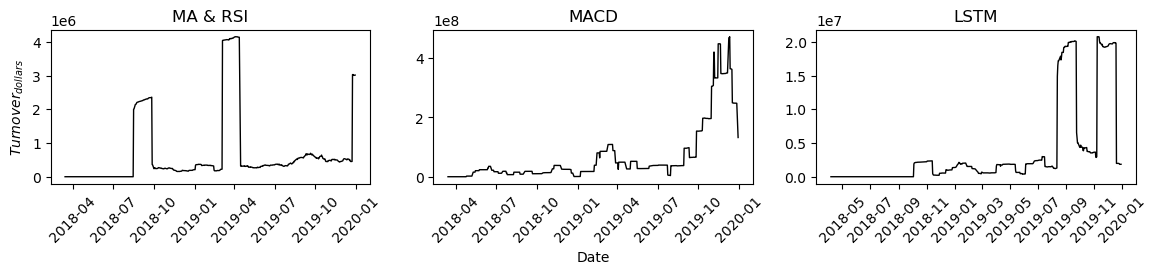

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (14, 2))
ax[0].plot(ma['Date'], ma_turnover_dollar, lw = 1, color = 'black', label = 'MA & RSI model')
ax[1].plot(macd['Date'], macd_turnover_dollar, lw = 1, color = 'black', label = 'MACD model')
ax[2].plot(lstm['Date'], lstm_turnover_dollar, lw = 1, color = 'black', label = 'LSTM model')
ax[0].tick_params(axis = 'x', labelrotation=45)
ax[1].tick_params(axis = 'x', labelrotation=45)
ax[2].tick_params(axis = 'x', labelrotation=45)
ax[0].set_ylabel(r"$Turnover_{dollars}$")
ax[0].set_title(f'MA & RSI')
ax[1].set_title(f'MACD')
ax[2].set_title(f'LSTM')
ax[1].set_xlabel(r"Date")


In [9]:
def modified_plot_PnL(fig, ax, date, dV, dVcap, dVtot, label):
   
    # plot position on training set
    ax[0, 0].plot(date, dV, lw = 1, alpha = 1, label = label)
    ax[0, 0].set_xlabel('Time')
    ax[0, 0].set_ylabel(r'$\Delta V_t$')
    ax[0, 0].set_title('PnL in asset')
    ax[0, 0].grid(True)
    ax[0, 0].tick_params(axis = 'x',labelrotation=45)
    
    ax[0, 1].plot(date, dVcap, lw = 1, alpha = 1, label = label)
    ax[0, 1].set_title('PnL in unused capital')
    ax[0, 1].set_xlabel('Time')
    ax[0, 1].set_ylabel(r'$\Delta V_t^{cap}$')
    ax[0, 1].grid(True)
    ax[0, 1].tick_params(axis = 'x',labelrotation=45)
    
    ax[0, 2].plot(date, dVtot, lw = 1, alpha = 1, label = label)
    ax[0, 2].set_title('PnL in total capital')
    ax[0, 2].set_xlabel('Time')
    ax[0, 2].set_ylabel(r'$\Delta V_t^{total}$')
    ax[0, 2].grid(True)
    ax[0, 2].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 0].plot(date, np.cumsum(dV), lw = 1, alpha = 1, label = label)
    ax[1, 0].set_title('Cumulative PnL in asset')
    ax[1, 0].set_xlabel('Time')
    ax[1, 0].set_ylabel(r'Cumulative $\Delta V_t$')
    ax[1, 0].grid(True)
    ax[1, 0].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 1].plot(date, np.cumsum(dVcap), lw = 1, alpha = 1, label = label)
    ax[1, 1].set_title('Cumulative PnL in unused capital')
    ax[1, 1].set_xlabel('Time')
    ax[1, 1].set_ylabel(r'Cumulative $\Delta V_t^{cap}$')
    ax[1, 1].grid(True)
    ax[1, 1].tick_params(axis = 'x',labelrotation=45)
    
    ax[1, 2].plot(date, np.cumsum(dVtot), lw = 1, alpha = 1, label = label)
    ax[1, 2].set_title('Cumulative PnL in total capital')
    ax[1, 2].set_xlabel('Time')
    ax[1, 2].set_ylabel(r'Cumulative $\Delta V_t^{total}$')
    ax[1, 2].grid(True)
    ax[1, 2].tick_params(axis = 'x', labelrotation=45)

    fig.tight_layout()
    fig.show()

In [10]:
# Calculate final pnl
print(f"MA & RSI: {np.cumsum(np.array(ma['dVtot']))[-1]}")
print(f"MACD: {np.cumsum(np.array(macd['dVtot']))[-1]}")
print(f"LSTM: {np.cumsum(np.array(lstm['dVtot']))[-1]}")


MA & RSI: 326893.85620387824
MACD: 6476085.326565944
LSTM: 1040855.4193922359


/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_46247/2472899818.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


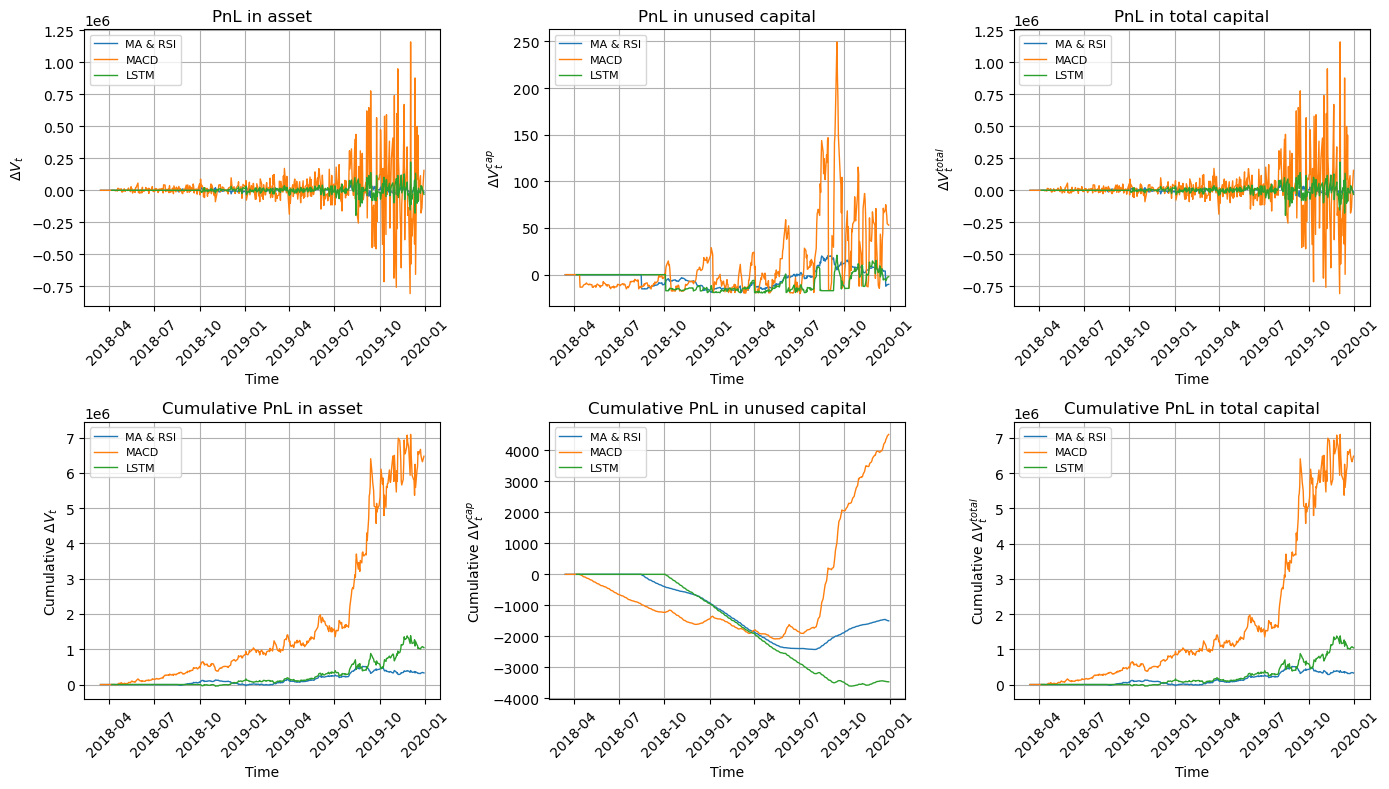

In [11]:
fig, ax = plt.subplots(2, 3, figsize = (14, 8))
modified_plot_PnL(fig, ax, date = ma['Date'], dV = ma['dV'], dVcap = ma['dVcap'], dVtot = ma['dVtot'], label = 'MA & RSI')
modified_plot_PnL(fig, ax, date = macd['Date'], dV = macd['dV'], dVcap = macd['dVcap'], dVtot = macd['dVtot'], label = 'MACD')
modified_plot_PnL(fig, ax, date = lstm['Date'], dV = lstm['dV'], dVcap = lstm['dVcap'], dVtot = lstm['dVtot'], label = 'LSTM')
ax[0, 0].legend(fontsize = 8)
ax[0, 1].legend(fontsize = 8)
ax[0, 2].legend(fontsize = 8)
ax[1, 0].legend(fontsize = 8)
ax[1, 1].legend(fontsize = 8)
ax[1, 2].legend(fontsize = 8)


### Explore if risk-free rate increases

In [12]:
ma = pd.read_csv('models_data/MA_RSI_TEST.csv')
ma_rf = pd.read_csv('models_data/MA_RSI_TEST_RF.csv')
ma['Date'] = pd.to_datetime(ma['Date'])
ma_rf['Date'] = pd.to_datetime(ma_rf['Date'])

/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_46247/2472899818.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


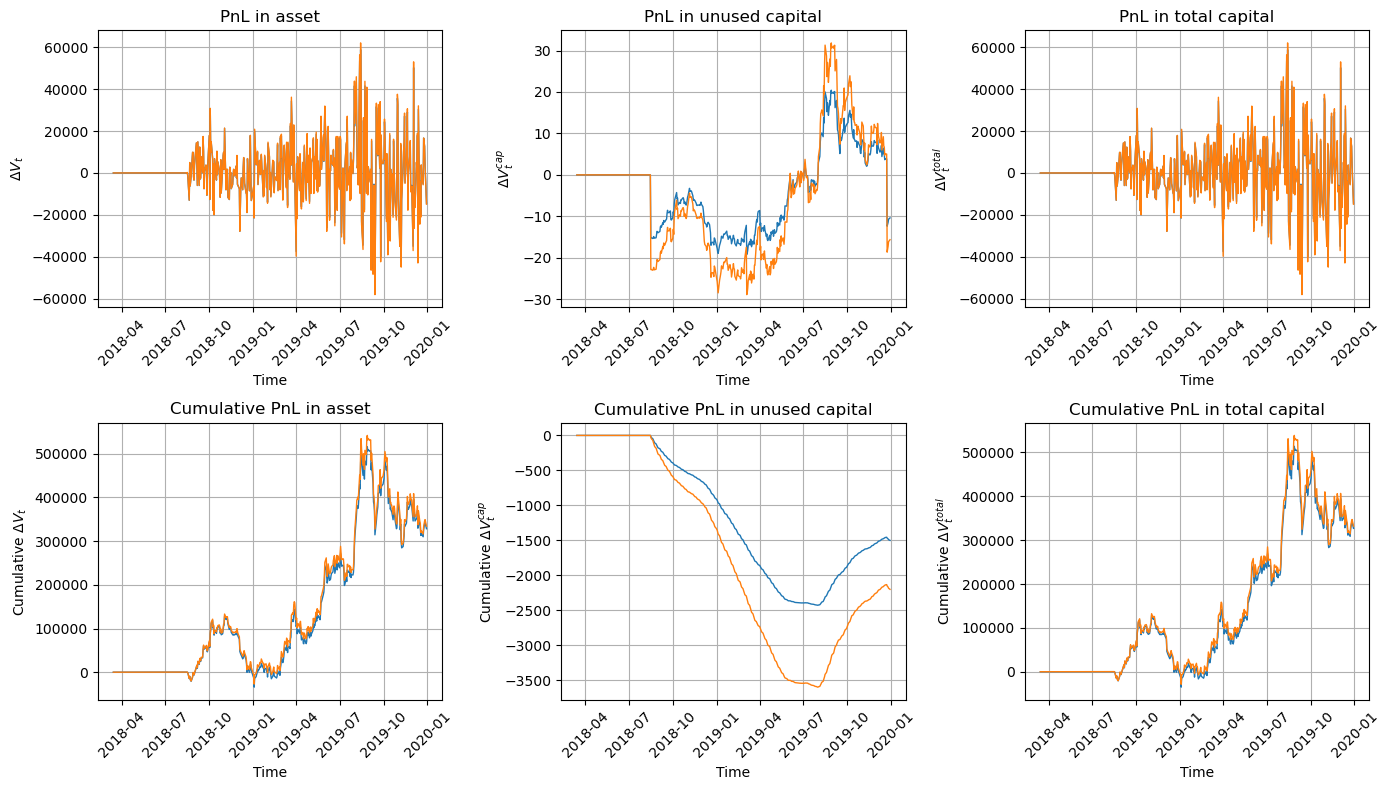

In [13]:
fig, ax = plt.subplots(2, 3, figsize = (14, 8))
modified_plot_PnL(fig, ax, date = ma['Date'], dV = ma['dV'], dVcap = ma['dVcap'], dVtot = ma['dVtot'], label = r'MA & RSI with 100% r_t^f')
modified_plot_PnL(fig, ax, date = ma_rf['Date'], dV = ma_rf['dV'], dVcap = ma_rf['dVcap'], dVtot = ma_rf['dVtot'], label = r'MA & RSI with 150% r_t^f')

In [14]:
def evaluate_strategy(df, signals, init_capital=200000, max_leverage=10, control_leverage=False, hold=False):
    trade_days = len(df)

    prices = df['Close'].to_numpy()
    effrs = df['Daily EFFR'].to_numpy()
    excess_returns = df['Excess return'].to_numpy()

    units = np.zeros(trade_days)
    theta = np.zeros(trade_days)
    margins = np.zeros(trade_days)

    dV = np.zeros(trade_days)
    dV_cap = np.zeros(trade_days)
    dV_total = np.zeros(trade_days)

    V = np.zeros(trade_days)
    V[0] = init_capital
    V_cap = np.zeros(trade_days)
    V_total = V + V_cap

    for t, signal in enumerate(signals):
        # First day, no trade
        if t == 0:
            V_cap[t] = V_total[t] - margins[t]
            dV_cap[t] = V_cap[t] * effrs[t]
            dV_total[t] = dV_cap[t] + dV[t]
            continue

        V_total[t] = V_total[t-1] + dV_total[t-1]
        V[t] = V[t-1] + dV[t-1]

        if signal == 1:
            leverage = max_leverage
        else:
            leverage = max_leverage / 2 if control_leverage else max_leverage

        if signal == 0 and hold:
            units[t] = units[t-1]
            theta[t] = units[t] * prices[t]
        else:
            theta[t] = signal * V[t] * leverage
            units[t] = theta[t] / prices[t]

        # Adjust the theta according to the trade value before calculating the pnl
        # If theta > V * leverage, adjust the units held, cut the excess value, save it to capital,
        # If theta < -V * leverage, adjust the units held, cut the excess value from capital.
        # If not enough money in capital, out of trading.
        if np.abs(theta[t]) > V[t] * leverage:
            diffs = np.abs(theta[t]) - V[t] * leverage
            units[t] -= np.sign(theta[t]) * diffs / prices[t]
            theta[t] -= np.sign(theta[t]) * diffs
            V_cap[t] += np.sign(theta[t]) * diffs

        # Calculate the margin used and get the final capital value
        margins[t] = np.abs(theta[t]) / leverage
        V_cap[t] += V_total[t] - margins[t]

        # Calculate the daily pnl
        dV[t] = theta[t] * excess_returns[t]
        dV_cap[t] = V_cap[t] * effrs[t]
        dV_total[t] = dV[t] + dV_cap[t]

    wrapped_data = {
        'units_held': units,
        'margins': margins,
        'trade_pnl': dV,
        'cap_pnl': dV_cap,
        'total_pnl': dV_total,
        'theta': theta,
        'trade_vals': V,
        'cap_vals': V_cap,
        'total_vals': V_total
    }

    return wrapped_data